<a href="https://colab.research.google.com/github/jyothi4218/Customer_Churn/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv(r'/content/shuffled_file.csv')


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,Age,Gender,Subscription_Type,tenure(months),Daily_Read_Time,Active_Days_Per_Week,Satisfaction_Score,Complaints,Reason_For_Switch,Churn_Label
0,41,Female,Yearly,12,4.38,4,7,0,Not Switching,0
1,63,Male,Monthly,2,2.62,1,9,1,Not Switching,0
2,41,Female,Quarterly,2,4.47,2,7,0,Not Switching,0
3,40,Male,Quarterly,4,4.52,1,8,0,Not Switching,0
4,21,Female,Yearly,2,3.55,3,6,3,Switched due to attractive subscription offer,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   Subscription_Type     1000 non-null   object 
 3   tenure(months)        1000 non-null   int64  
 4   Daily_Read_Time       1000 non-null   float64
 5   Active_Days_Per_Week  1000 non-null   int64  
 6   Satisfaction_Score    1000 non-null   int64  
 7   Complaints            1000 non-null   int64  
 8   Reason_For_Switch     1000 non-null   object 
 9   Churn_Label           1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


EDA

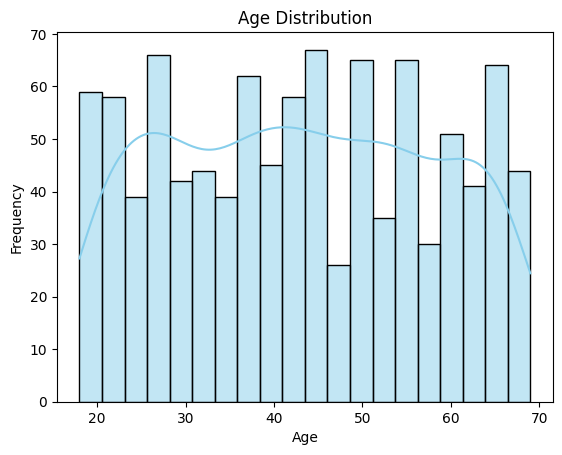

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


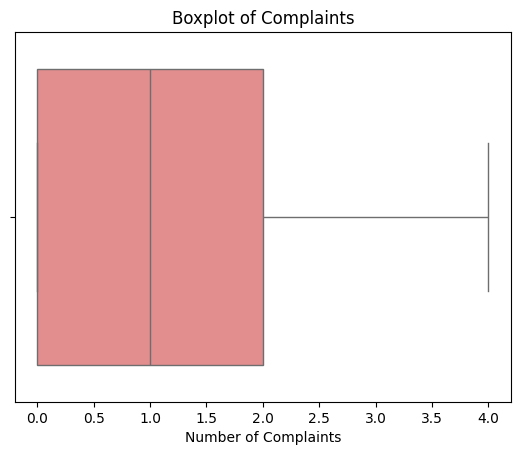

In [ ]:
sns.boxplot(x=df['Complaints'] ,color='lightcoral')
plt.title('Boxplot of Complaints')
plt.xlabel('Number of Complaints')
plt.show()

/tmp/ipython-input-790559543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription_Type', data=df, palette='Set2')


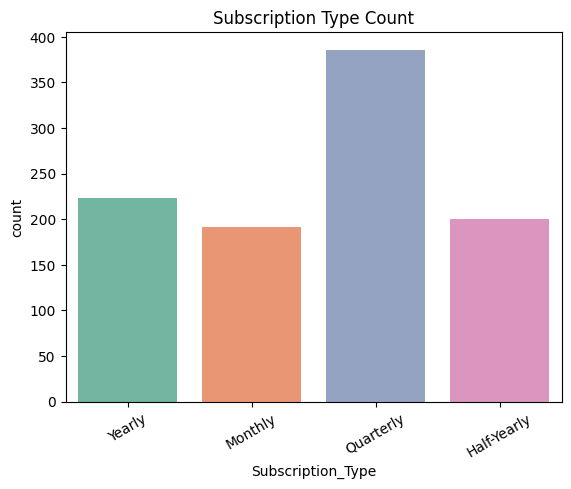

In [ ]:
sns.countplot(x='Subscription_Type', data=df, palette='Set2')
plt.title('Subscription Type Count')
plt.xticks(rotation=30)  # tilt labels if too long
plt.show()

/tmp/ipython-input-3805570555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction_Score', data=df, palette='Set2')


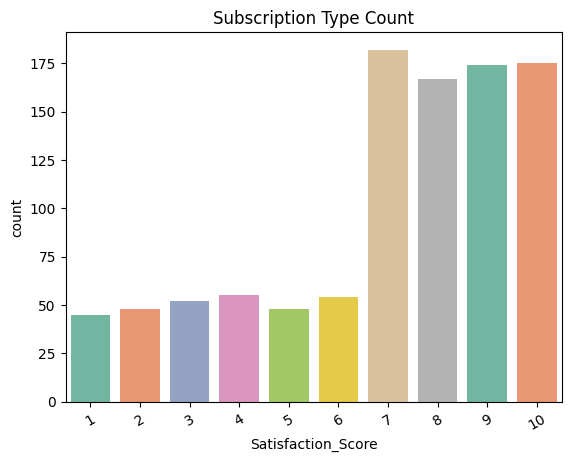

In [ ]:
sns.countplot(x='Satisfaction_Score', data=df, palette='Set2')
plt.title('Subscription Type Count')
plt.xticks(rotation=30)  # tilt labels if too long
plt.show()

BIVARIANT ANALYSIS

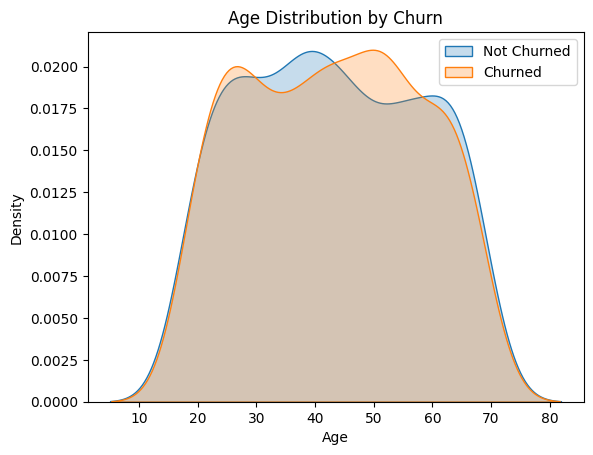

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df[df['Churn_Label'] == 0], x='Age', label='Not Churned', fill=True)
sns.kdeplot(data=df[df['Churn_Label'] == 1], x='Age', label='Churned', fill=True)
plt.title('Age Distribution by Churn')
plt.legend()
plt.show()

/tmp/ipython-input-1280752054.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn_Label', y='Satisfaction_Score', palette='coolwarm')


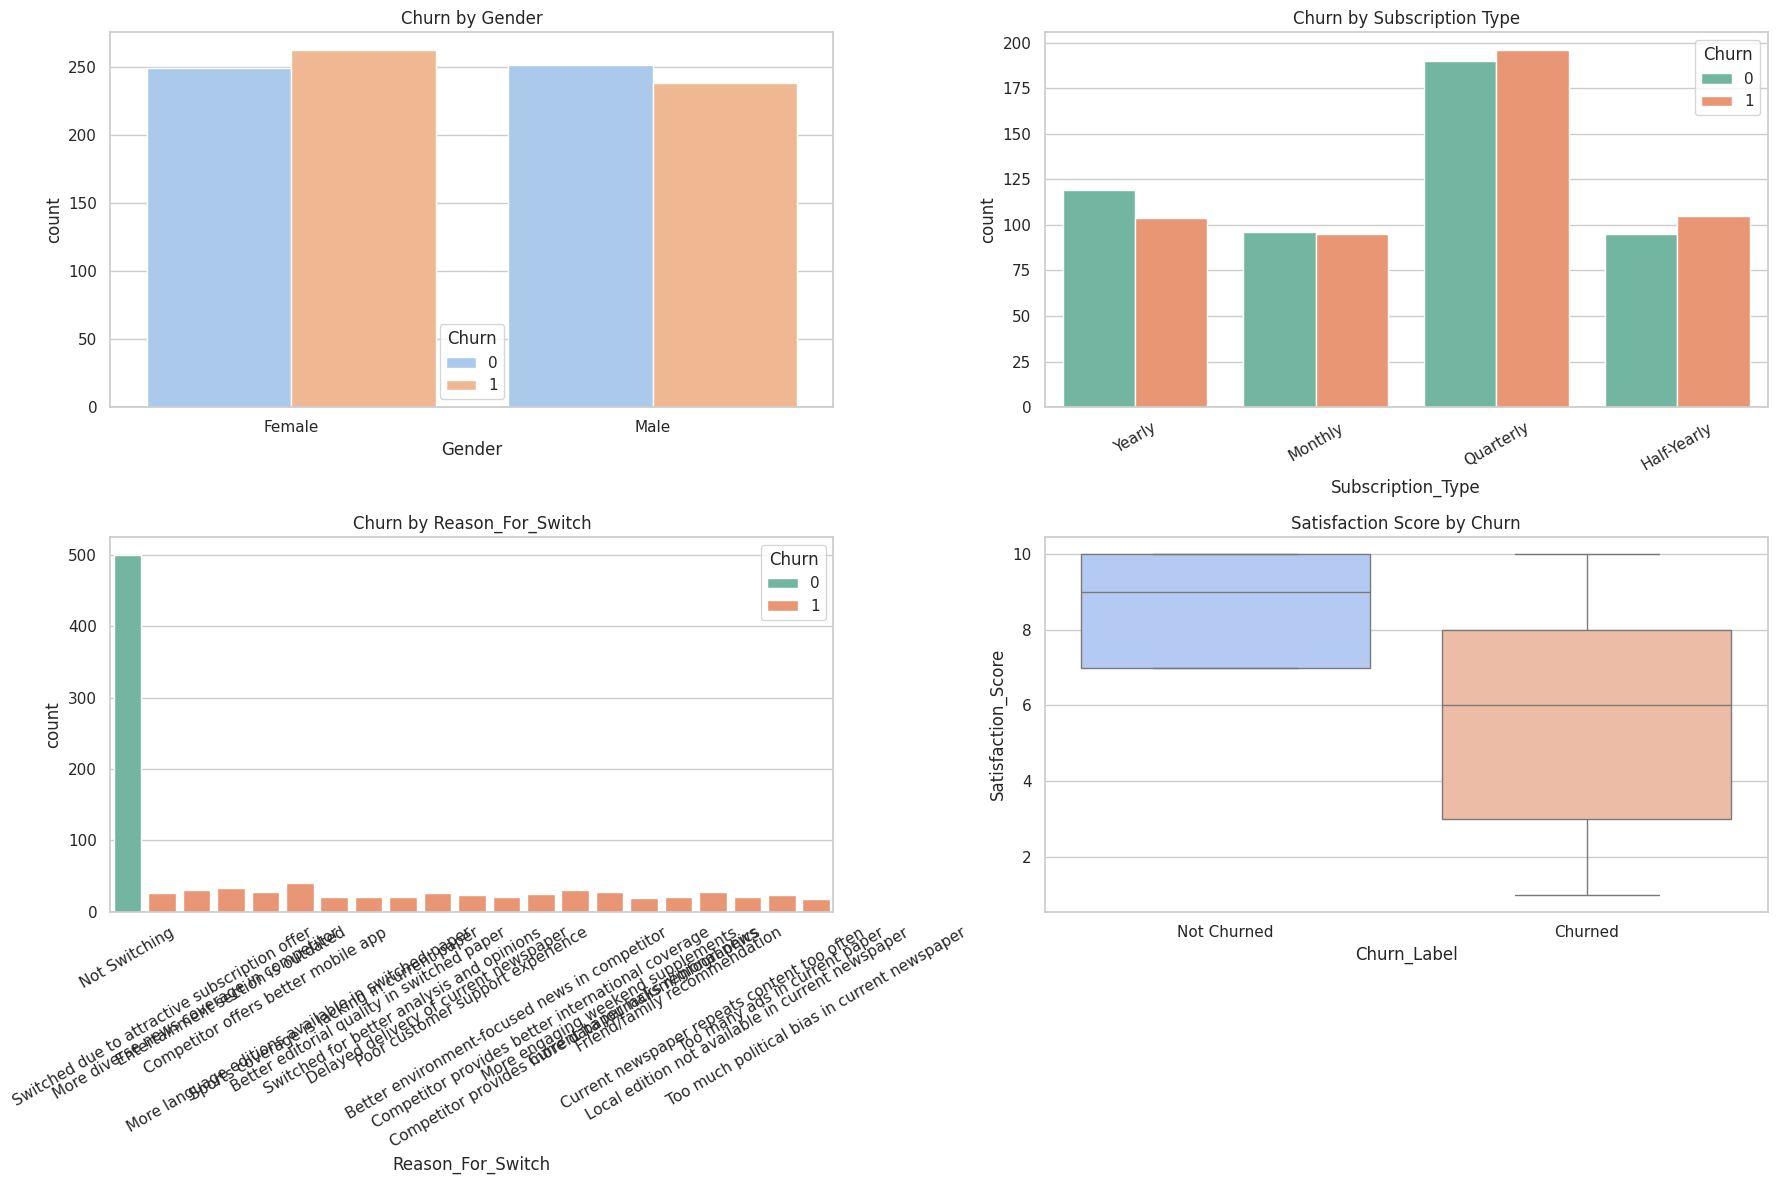

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# 1. Gender vs Churn
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Gender', hue='Churn_Label', palette='pastel')
plt.title('Churn by Gender')
plt.legend(title='Churn')

# 2. Subscription Type vs Churn
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Subscription_Type', hue='Churn_Label', palette='Set2')
plt.title('Churn by Subscription Type')
plt.xticks(rotation=30)
plt.legend(title='Churn')

# 2. Subscription Type vs Churn
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Reason_For_Switch', hue='Churn_Label', palette='Set2')
plt.title('Churn by Reason_For_Switch')
plt.xticks(rotation=30)
plt.legend(title='Churn')

# 3. Satisfaction Score vs Churn
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Churn_Label', y='Satisfaction_Score', palette='coolwarm')
plt.title('Satisfaction Score by Churn')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# # 4. Complaints vs Churn
# plt.subplot(2, 2, 4)
# sns.boxplot(data=df, x='Churn_Label', y='Complaints', palette='Set3')
# plt.title('Complaints by Churn')
# plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()


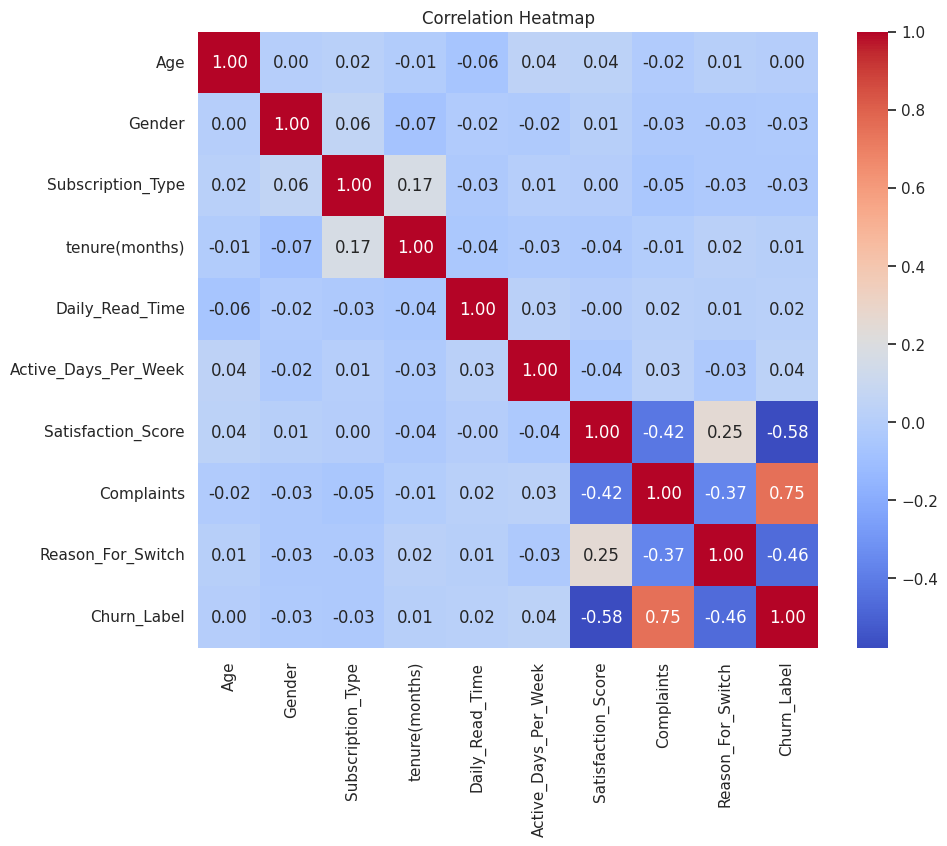

In [ ]:
import numpy as np

# Convert categorical columns to numeric temporarily for correlation
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Subscription_Type'] = df_encoded['Subscription_Type'].astype('category').cat.codes
df_encoded['Reason_For_Switch'] = df_encoded['Reason_For_Switch'].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
x = df.drop('Churn_Label','Reason_For_Switch', axis=1)
y = df['Churn_Label']


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
le1 = LabelEncoder()
df['Gender'] = le1.fit_transform(df['Gender'])

le2 = LabelEncoder()
df['Subscription_Type'] = le2.fit_transform(df['Subscription_Type'])

# le3 = LabelEncoder()
# df['Reason_For_Switch'] = le3.fit_transform(df['Reason_For_Switch'])

In [ ]:
#  scalling
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
df['Age'] = scaler1.fit_transform(df[['Age']])

scaler2 = MinMaxScaler()
df['Complaints'] = scaler2.fit_transform(df[['Complaints']])

scaler3 = MinMaxScaler()
df['Satisfaction_Score'] = scaler3.fit_transform(df[['Satisfaction_Score']])

scaler4 = MinMaxScaler()
df['tenure(months)'] = scaler4.fit_transform(df[['tenure(months)']])

scaler5 = MinMaxScaler()
df['Daily_Read_Time'] = scaler5.fit_transform(df[['Daily_Read_Time'] ])

scale6 = MinMaxScaler()
df['Active_Days_Per_Week'] = scale6.fit_transform(df[['Active_Days_Per_Week']])

In [ ]:
x = df.drop(columns=['Reason_For_Switch','Churn_Label'], axis=1)
y = df['Churn_Label']

In [ ]:
# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96
Confusion Matrix:
 [[98  2]
 [ 6 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       0.98      0.94      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('gender.pkl','wb') as f:
  pickle.dump(le1,f)
with open('Subscription_Type.pkl','wb') as f:
  pickle.dump(le2,f)


In [ ]:
with open('age.pkl','wb') as f:
  pickle.dump(scaler1,f)
with open('complaints.pkl','wb') as f:
  pickle.dump(scaler2,f)
with open('satisfaction.pkl','wb') as f:
  pickle.dump(scaler3,f)
with open('tenure.pkl','wb') as f:
  pickle.dump(scaler4,f)
with open('Daily_Read_Time.pkl','wb') as f:
  pickle.dump(scaler5,f)
with open('Active_Days_Per_Week.pkl','wb') as f:
  pickle.dump(scale6,f)